MERT GÜNEŞ

2021702093

IE 582 - HOMEWORK 2

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

QUESTION 1

In [87]:
data = pd.read_csv("IE582_Fall21_HW2_q1_data.csv")

In [88]:
data

,X1,X2,class
0,0.569483,0.822003,a
1,0.411469,0.911424,a
2,0.417385,-0.908730,a
3,-0.791828,0.610745,a
4,-0.806777,-0.590857,a
...,...,...,...
193,-0.662932,1.886934,b
194,0.316428,1.974810,b
195,-1.625464,-1.165275,b
196,-1.378755,-1.448804,b


PCA

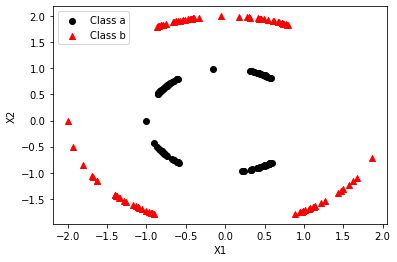

In [89]:
plt.scatter(data[data["class"]=="a"]["X1"], data[data["class"]=="a"]["X2"], marker='o', c="k")
plt.scatter(data[data["class"]=="b"]["X1"], data[data["class"]=="b"]["X2"], marker='^', c="r")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(labels=["Class a","Class b"],loc="upper left")

In [90]:
data.loc[data["class"] == "a","class"] = 1
data.loc[data["class"] == "b","class"] = 2

In [91]:
X = data.drop(["class"],axis=1)
y = data["class"]

In [92]:
from sklearn.decomposition import PCA
mdl = PCA(n_components=1)
principalComponents = mdl.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,columns = ["PCA"])

In [93]:
principalDf= principalDf.reset_index()

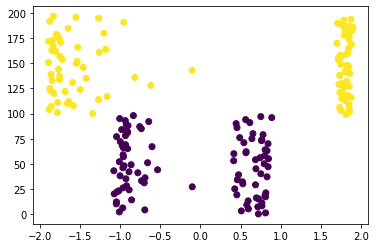

In [94]:
plt.scatter(principalDf["PCA"],principalDf["index"],c=y)

In [95]:
eigenvalues = mdl.explained_variance_
eigenvalues

array([1.79089975])

MDS

In [96]:
from sklearn.manifold import MDS
mdl = MDS(n_components=1)
MDSComponents = mdl.fit_transform(X)
MDSDf = pd.DataFrame(data = MDSComponents,columns = ["MDS"])

In [97]:
MDSDf= MDSDf.reset_index()

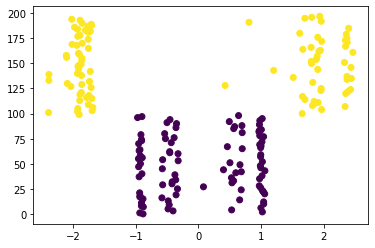

In [98]:
plt.scatter(MDSDf["MDS"],MDSDf["index"],c=y)

MDS with Different Similarity Measure

In [65]:
mdl2 = MDS(n_components=1,dissimilarity="precomputed")
MDSComponents = mdl.fit_transform(X)
MDSDf = pd.DataFrame(data = MDSComponents,columns = ["MDS"])

In [66]:
MDSDf= MDSDf.reset_index()

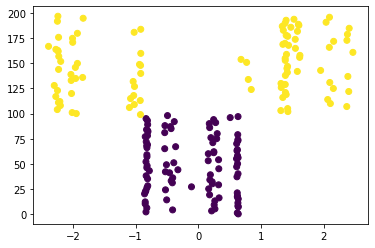

In [67]:
plt.scatter(MDSDf["MDS"],MDSDf["index"],c=y)

Part C

1. In general terms, the distribution is again formed by one cluster taking over the other, but it is in a much different situation than the original. It doesn't look like you can use it directly. 

2. A more dispersed data appears in MDS compared to PCA. Again, there is a dataset far from the original. When using Precomputed, the data is even more dispersed, according to Euclidian. 

3. I think neither of them can be used as a substitute for two-dimensional data. If one has to be chosen, PCA looks more like the original as it is less dispersed data. 

PCA with Different Features

In [99]:
data["squaredX1"] = data["X1"]**2
data["squaredX2"] = data["X2"]**2
data["product"] = data["X1"]*data["X2"]

In [100]:
data

,X1,X2,class,squaredX1,squaredX2,product
0,0.569483,0.822003,1,0.324311,0.675689,0.468117
1,0.411469,0.911424,1,0.169307,0.830693,0.375023
2,0.417385,-0.908730,1,0.174210,0.825790,-0.379290
3,-0.791828,0.610745,1,0.626991,0.373009,-0.483604
4,-0.806777,-0.590857,1,0.650889,0.349111,0.476689
...,...,...,...,...,...,...
193,-0.662932,1.886934,2,0.439479,3.560521,-1.250910
194,0.316428,1.974810,2,0.100127,3.899873,0.624885
195,-1.625464,-1.165275,2,2.642134,1.357866,1.894113
196,-1.378755,-1.448804,2,1.900966,2.099034,1.997547


In [101]:
X = data.drop(["class"],axis=1)
y = data["class"]

In [103]:
from sklearn.decomposition import PCA
mdl = PCA(n_components=1)
principalComponents = mdl.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,columns = ["PCA"])

In [104]:
principalDf= principalDf.reset_index()

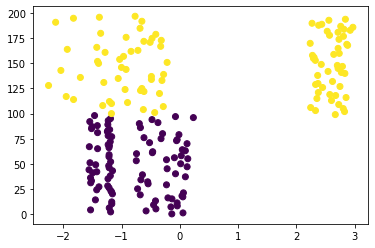

In [105]:
plt.scatter(principalDf["PCA"],principalDf["index"],c=y)

In [106]:
eigenvalues = mdl.explained_variance_
eigenvalues

array([2.49086525])

The eigenvalue indicates how much of the variance of the data is represented by PCA. We can say that the eigenvalue of this state of the data is higher than the 2-dimensional one and more variance is explained from here. 

QUESTION 2

In [107]:
map = pd.read_csv("ilmesafe.csv",encoding="latin-1",sep=";")

In [108]:
map

,ÝL ADI,ADANA,ADIYAMAN,AFYONKARAHÝSAR,AÐRI,AMASYA,ANKARA,ANTALYA,ARTVÝN,AYDIN,...,BATMAN,ÞIRNAK,BARTIN,ARDAHAN,IÐDIR,YALOVA,KARABÜK,KÝLÝS,OSMANÝYE,DÜZCE
0,ADANA,NaN,335.0,575.0,966.0,603.0,567.0,535.0,1035.0,874.0,...,621.0,709.0,782.0,1042.0,1066.0,899.0,714.0,246.0,87.0,735.0
1,ADIYAMAN,335.0,NaN,910.0,648.0,632.0,814.0,870.0,751.0,1209.0,...,303.0,471.0,1023.0,758.0,748.0,1147.0,955.0,210.0,248.0,976.0
2,AFYONKARAHÝSAR,575.0,910.0,NaN,1318.0,597.0,300.0,290.0,1243.0,345.0,...,1196.0,1284.0,515.0,1351.0,1461.0,338.0,447.0,821.0,662.0,375.0
3,AÐRI,966.0,648.0,1318.0,NaN,738.0,1141.0,1428.0,396.0,1640.0,...,369.0,430.0,1175.0,310.0,143.0,1363.0,1106.0,814.0,879.0,1192.0
4,AMASYA,603.0,632.0,597.0,736.0,NaN,413.0,825.0,695.0,938.0,...,796.0,982.0,437.0,783.0,881.0,625.0,368.0,639.0,608.0,454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,YALOVA,899.0,1152.0,338.0,1361.0,625.0,407.0,601.0,1254.0,510.0,...,1411.0,1562.0,371.0,1362.0,1472.0,NaN,350.0,1120.0,987.0,171.0
77,KARABÜK,714.0,960.0,447.0,1104.0,368.0,215.0,734.0,970.0,788.0,...,1164.0,1350.0,89.0,1078.0,1215.0,350.0,NaN,928.0,801.0,179.0
78,KÝLÝS,246.0,210.0,821.0,814.0,644.0,715.0,781.0,917.0,1120.0,...,469.0,557.0,1001.0,924.0,917.0,1125.0,933.0,NaN,159.0,949.0
79,OSMANÝYE,87.0,248.0,662.0,879.0,613.0,579.0,622.0,948.0,961.0,...,534.0,622.0,869.0,955.0,982.0,986.0,801.0,159.0,NaN,822.0


In [109]:
map = map.set_index("ÝL ADI")
map = map.fillna(0)

In [110]:
from sklearn.manifold import MDS
mdl = MDS(n_components=1)
MDSComponents = mdl.fit_transform(map)
MDSDf = pd.DataFrame(data = MDSComponents,columns = ["MDS"])

C:\Users\mertg\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [112]:
MDSDf

,MDS
0,574.984828
1,2462.498160
2,-3005.374007
3,4775.439825
4,3.397972
...,...
76,-3861.193039
77,-2074.502223
78,1941.931463
79,1161.344336


In [113]:
MDSDf = MDSDf.reset_index()

In [114]:
MDSDf = MDSDf.set_index(map.index)

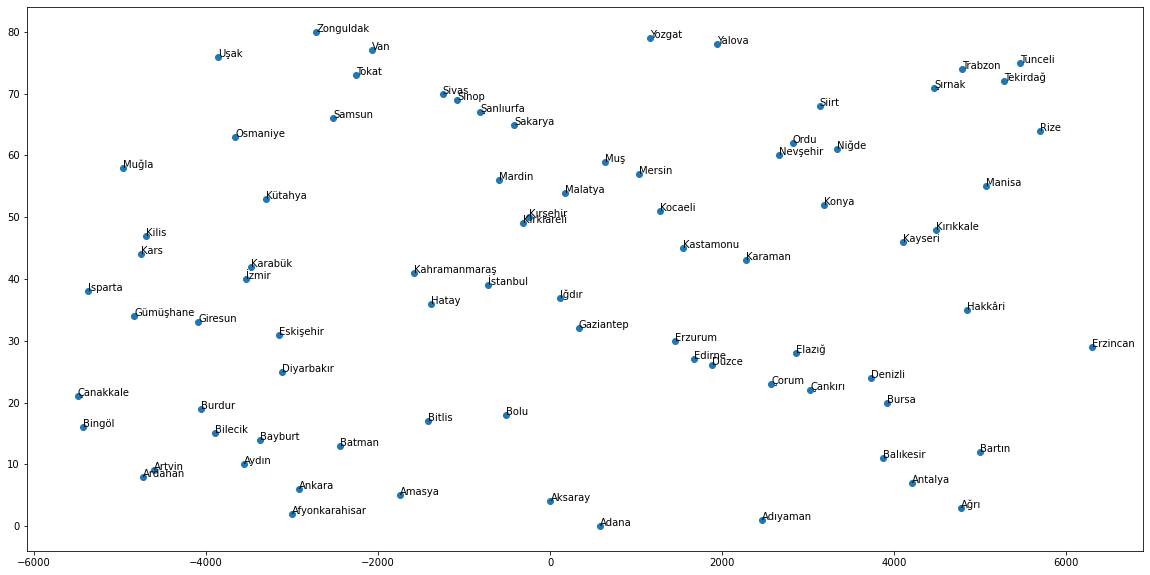

In [115]:
plt.figure(figsize=(20,10))
plt.scatter(MDSDf["MDS"],MDSDf["index"])
iller=["Adana", "Adıyaman", "Afyonkarahisar", "Ağrı", "Aksaray", "Amasya", "Ankara", "Antalya", "Ardahan", "Artvin", "Aydın", "Balıkesir", "Bartın", "Batman", "Bayburt", "Bilecik", "Bingöl", "Bitlis", "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum", "Denizli", "Diyarbakır", "Düzce", "Edirne", "Elazığ", "Erzincan", "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane", "Hakkâri", "Hatay", "Iğdır", "Isparta", "İstanbul", "İzmir", "Kahramanmaraş", "Karabük", "Karaman", "Kars", "Kastamonu", "Kayseri", "Kilis", "Kırıkkale", "Kırklareli", "Kırşehir", "Kocaeli", "Konya", "Kütahya", "Malatya", "Manisa", "Mardin", "Mersin", "Muğla", "Muş", "Nevşehir", "Niğde", "Ordu", "Osmaniye", "Rize", "Sakarya", "Samsun", "Şanlıurfa", "Siirt", "Sinop", "Sivas", "Şırnak", "Tekirdağ", "Tokat", "Trabzon", "Tunceli", "Uşak", "Van", "Yalova", "Yozgat", "Zonguldak"]
for a, b in enumerate(iller):
    plt.text(MDSDf["MDS"][a], MDSDf["index"][a], b)

Shape of 1 Dimensional MDS Data is very similar with Turkey Map, but because of 1 dimension generally places of cities are wrong with original places. For example, Adana's coordinates are very similar but İstanbul is in wrong place exactly.